<a href="https://colab.research.google.com/github/benasphy/n-gram/blob/main/n-gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install nltk wordcloud requests

In [2]:
import nltk
import requests
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import random

In [3]:
# Download necessary datasets
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
# Load corpus from URL
url = "https://drive.google.com/uc?export=download&id=1WnuCIeZglWU0uty8-uMOBwOWQM-zAHBJ"
response = requests.get(url)
corpus = response.text

# Tokenization
words = nltk.word_tokenize(corpus)

In [5]:
# Function to generate n-grams
def generate_ngrams(words, n):
    return list(ngrams(words, n))

# Generate n-grams
unigrams = generate_ngrams(words, 1)
bigrams = generate_ngrams(words, 2)
trigrams = generate_ngrams(words, 3)
fourgrams = generate_ngrams(words, 4)

# Compute probabilities
def compute_ngram_probabilities(ngrams_list):
    counts = Counter(ngrams_list)
    total_count = sum(counts.values())
    probabilities = {gram: count / total_count for gram, count in counts.items()}
    return probabilities

unigram_probs = compute_ngram_probabilities(unigrams)
bigram_probs = compute_ngram_probabilities(bigrams)
trigram_probs = compute_ngram_probabilities(trigrams)
fourgram_probs = compute_ngram_probabilities(fourgrams)

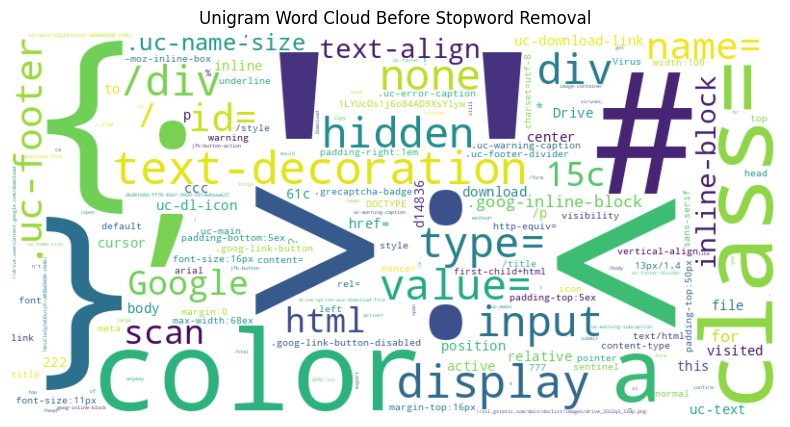

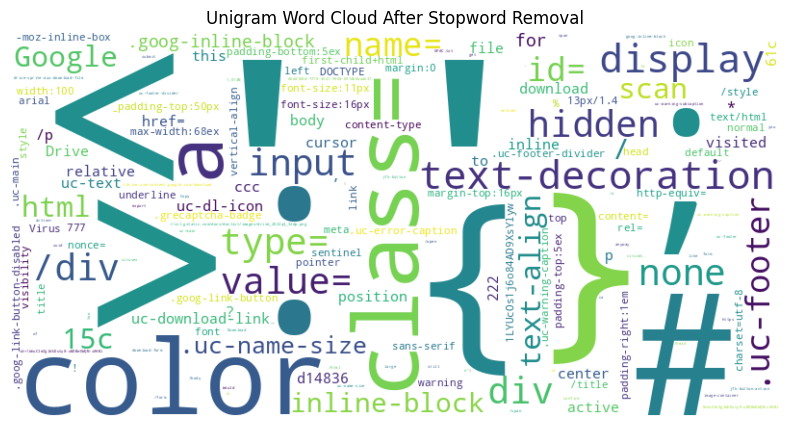

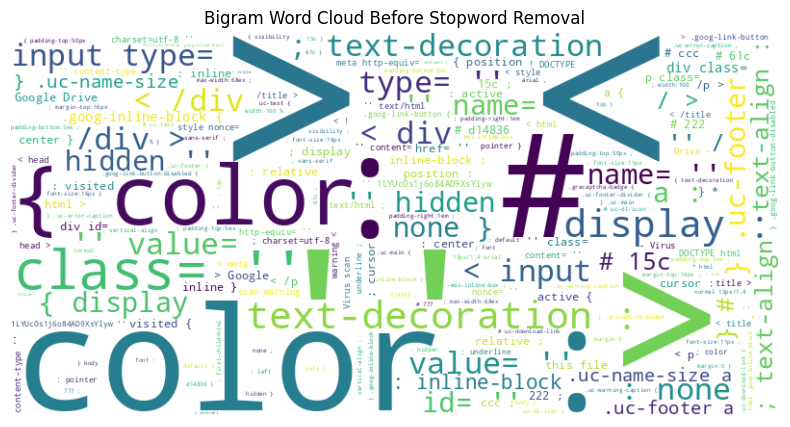

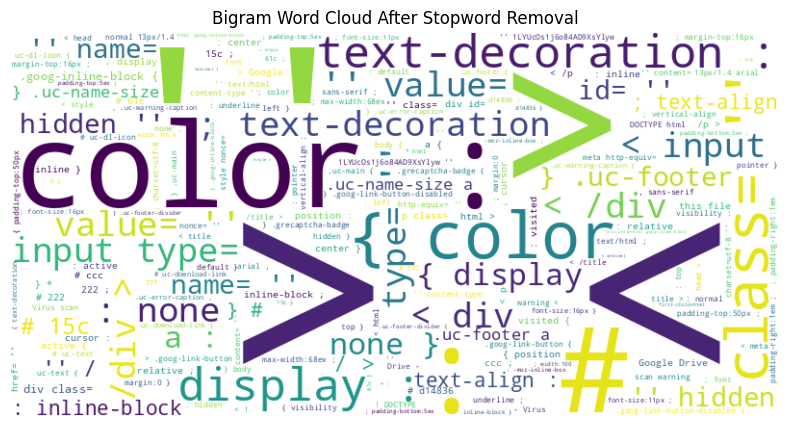

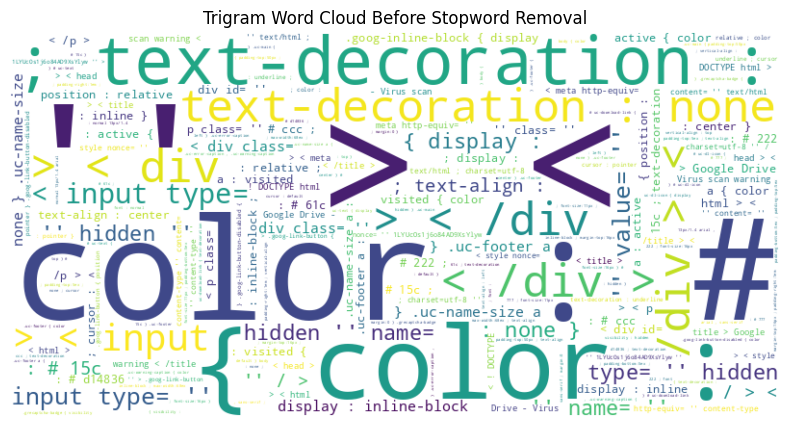

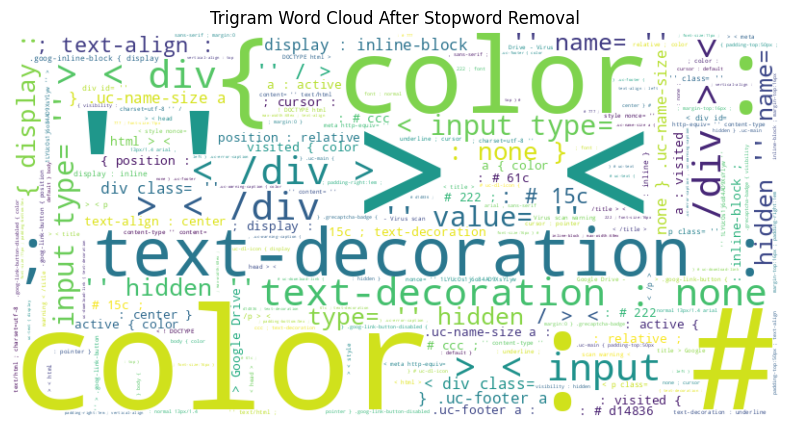

In [6]:
# Remove stopwords and recompute
amharic_stopwords = {"እና", "እስከ", "እዚህ", "ላይ", "ለ", "በ", "ከ", "የ", "ውስጥ"}  # Add more stopwords
filtered_words = [word for word in words if word not in amharic_stopwords]
filtered_unigrams = generate_ngrams(filtered_words, 1)
filtered_bigrams = generate_ngrams(filtered_words, 2)
filtered_trigrams = generate_ngrams(filtered_words, 3)
filtered_fourgrams = generate_ngrams(filtered_words, 4)

# Word Cloud
def plot_wordcloud(ngrams_list, title):
    # Convert ngrams (tuples) to strings for wordcloud
    frequencies = Counter([" ".join(ngram) for ngram in ngrams_list]) # Join tuple elements with space to create string keys
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(unigrams, "Unigram Word Cloud Before Stopword Removal")
plot_wordcloud(filtered_unigrams, "Unigram Word Cloud After Stopword Removal")
plot_wordcloud(bigrams, "Bigram Word Cloud Before Stopword Removal")
plot_wordcloud(filtered_bigrams, "Bigram Word Cloud After Stopword Removal")
plot_wordcloud(trigrams, "Trigram Word Cloud Before Stopword Removal")
plot_wordcloud(filtered_trigrams, "Trigram Word Cloud After Stopword Removal")


In [7]:
# Sentence probability using bigram model
def bigram_conditional_prob(word1, word2):
    bigram_count = Counter(bigrams)[(word1, word2)]
    unigram_count = Counter(unigrams)[(word1,)]
    return bigram_count / unigram_count if unigram_count > 0 else 0

def sentence_probability(sentence):
    words = nltk.word_tokenize(sentence)
    bigram_sentence = list(ngrams(words, 2))
    probability = 1
    for bigram in bigram_sentence:
        probability *= bigram_conditional_prob(bigram[0], bigram[1])
    return probability

print("Probability of 'ኢትዮጵያ ታሪካዊ ሀገር ናት':", sentence_probability("ኢትዮጵያ ታሪካዊ ሀገር ናት"))

Probability of 'ኢትዮጵያ ታሪካዊ ሀገር ናት': 0


In [8]:
# Generate random sentences
def generate_sentence(n):
    sentence = [random.choice(words)]
    for _ in range(n-1):
        possible_words = [bigram[1] for bigram in bigrams if bigram[0] == sentence[-1]]
        if possible_words:
            sentence.append(random.choice(possible_words))
        else:
            break
    return " ".join(sentence)

print("Generated Sentence:", generate_sentence(10))
print("As n increases, the sentences become more structured and contextually coherent.")

Generated Sentence: a : inline } .uc-name-size a : top } .uc-footer
As n increases, the sentences become more structured and contextually coherent.


In [9]:
# Intrinsic Evaluation: Perplexity
def perplexity(test_sentence):
    test_words = nltk.word_tokenize(test_sentence)
    test_bigrams = list(ngrams(test_words, 2))
    probability = sentence_probability(test_sentence)
    perplexity_score = math.pow(1/probability, 1/len(test_bigrams)) if probability > 0 else float('inf')
    return perplexity_score

print("Perplexity of 'ኢትዮጵያ ታሪካዊ ሀገር ናት':", perplexity("ኢትዮጵያ ታሪካዊ ሀገር ናት"))

# Extrinsic Evaluation: Task-based Assessment
def extrinsic_evaluation():
    print("Evaluate the n-gram model by testing it on a downstream NLP task, such as text classification or machine translation.")

extrinsic_evaluation()

Perplexity of 'ኢትዮጵያ ታሪካዊ ሀገር ናት': inf
Evaluate the n-gram model by testing it on a downstream NLP task, such as text classification or machine translation.
